# **Exploratory Data Analysis**

## **1. Define the Context and Scope of the Project**
  ### Project Goals and Objectives:

        •	The goal is to classify ECG signals into different categories using deep learning techniques.

        •	We will work with the MIT-BIH Arrhythmia dataset and Physionet's PTB Diagnostic ECG Database.




In [ ]:
#Read data 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest
import os


# Load the datasets
mitbih_train = pd.read_csv('F:/course/my_project/Heart/Data/mitbih_train.csv', header=None)
mitbih_test = pd.read_csv('F:/course/my_project/Heart/Data/mitbih_test.csv', header=None)
ptbdb_abnormal = pd.read_csv('F:/course/my_project/Heart/Data/ptbdb_abnormal.csv', header=None)
ptbdb_normal = pd.read_csv('F:/course/my_project/Heart/Data/ptbdb_normal.csv', header=None)

# Now you can proceed with your analysis using the loaded datasets

## **2. Data Audit**
We'll fill out the data audit template for the MIT-BIH and PTBDB datasets.

In [4]:
# Initialize a list to hold the audit data

# Function to generate the data audit table for a given dataset
def generate_data_audit(dataset, dataset_name):
    audit_data = []
    for col in dataset.columns:
        col_data = {
            '# Column': col,
            'Name of the Column': f'Feature {col}' if col < dataset.shape[1] - 1 else 'Label',
            'Variable\'s type': 'Feature' if col < dataset.shape[1] - 1 else 'Target',
            'Description': f'ECG signal feature {col + 1}' if col < dataset.shape[1] - 1 else 'ECG class label',
            'Is the variable available before prediction': 'Yes' if col < dataset.shape[1] - 1 else 'No',
            'Variable\'s type (detailed)': dataset.dtypes[col],
            'Percentage of missing values': f"{dataset[col].isnull().mean() * 100:.2f}%",
            'Categorical / Quantitative': 'Quantitative' if col < dataset.shape[1] - 1 else 'Categorical'
        }
        audit_data.append(col_data)
    audit_df = pd.DataFrame(audit_data)
    print(f"\nData Audit for {dataset_name} Dataset")
    print(audit_df)
    print("\n")

# Generate data audit tables for all datasets
generate_data_audit(mitbih_train, "MIT-BIH Train")
generate_data_audit(mitbih_test, "MIT-BIH Test")
generate_data_audit(ptbdb_normal, "PTBDB Normal")
generate_data_audit(ptbdb_abnormal, "PTBDB Abnormal")


Data Audit for MIT-BIH Train Dataset
     # Column Name of the Column Variable's type             Description  \
0           0          Feature 0         Feature    ECG signal feature 1   
1           1          Feature 1         Feature    ECG signal feature 2   
2           2          Feature 2         Feature    ECG signal feature 3   
3           3          Feature 3         Feature    ECG signal feature 4   
4           4          Feature 4         Feature    ECG signal feature 5   
..        ...                ...             ...                     ...   
183       183        Feature 183         Feature  ECG signal feature 184   
184       184        Feature 184         Feature  ECG signal feature 185   
185       185        Feature 185         Feature  ECG signal feature 186   
186       186        Feature 186         Feature  ECG signal feature 187   
187       187              Label          Target         ECG class label   

    Is the variable available before prediction V

## **3. The Individual Signals:** 

### **Data Loading and Preparation:**

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# MIT-BIH Dataset
mitbih_test_df = pd.read_csv("mitbih_test.csv")
mitbih_train_df = pd.read_csv("mitbih_train.csv")
# Renaming the columns
new_column_names = range(1, len(mitbih_train_df.columns) + 1)
mitbih_train_df.columns = new_column_names
new_column_names = range(1, len(mitbih_test_df.columns) + 1)
mitbih_test_df.columns = new_column_names
# Transforming the Target Variable to Integer
mitbih_train_df[188]=mitbih_train_df[188].astype(int)
mitbih_test_df[188]=mitbih_test_df[188].astype(int)

# PTBDB Dataset
ptbdb_abnormal_df = pd.read_csv("ptbdb_abnormal.csv")
ptbdb_normal_df = pd.read_csv("ptbdb_normal.csv")
# Renaming the columns
new_column_names = range(1, len(ptbdb_normal_df.columns) + 1)
ptbdb_normal_df.columns = new_column_names
new_column_names = range(1, len(ptbdb_abnormal_df.columns) + 1)
ptbdb_abnormal_df.columns = new_column_names
# Combining the two Dataframes 
ptbdb_comb_df = pd.concat([ptbdb_normal_df, ptbdb_abnormal_df], ignore_index=True)
# Transforming the Target Variable to Integer
ptbdb_comb_df[188]=ptbdb_comb_df[188].astype(int)

### **The Datasets and Classes:**

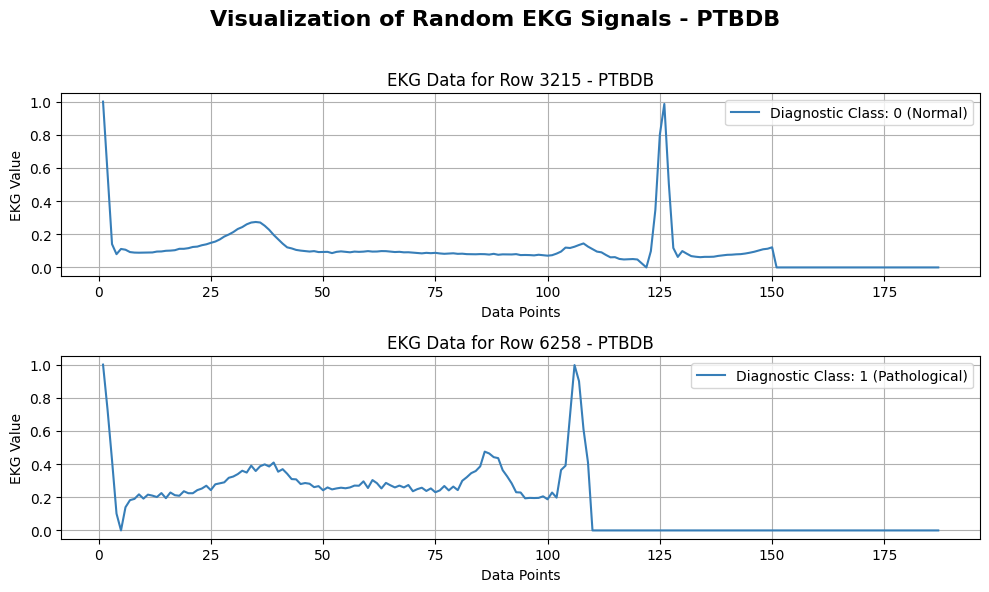

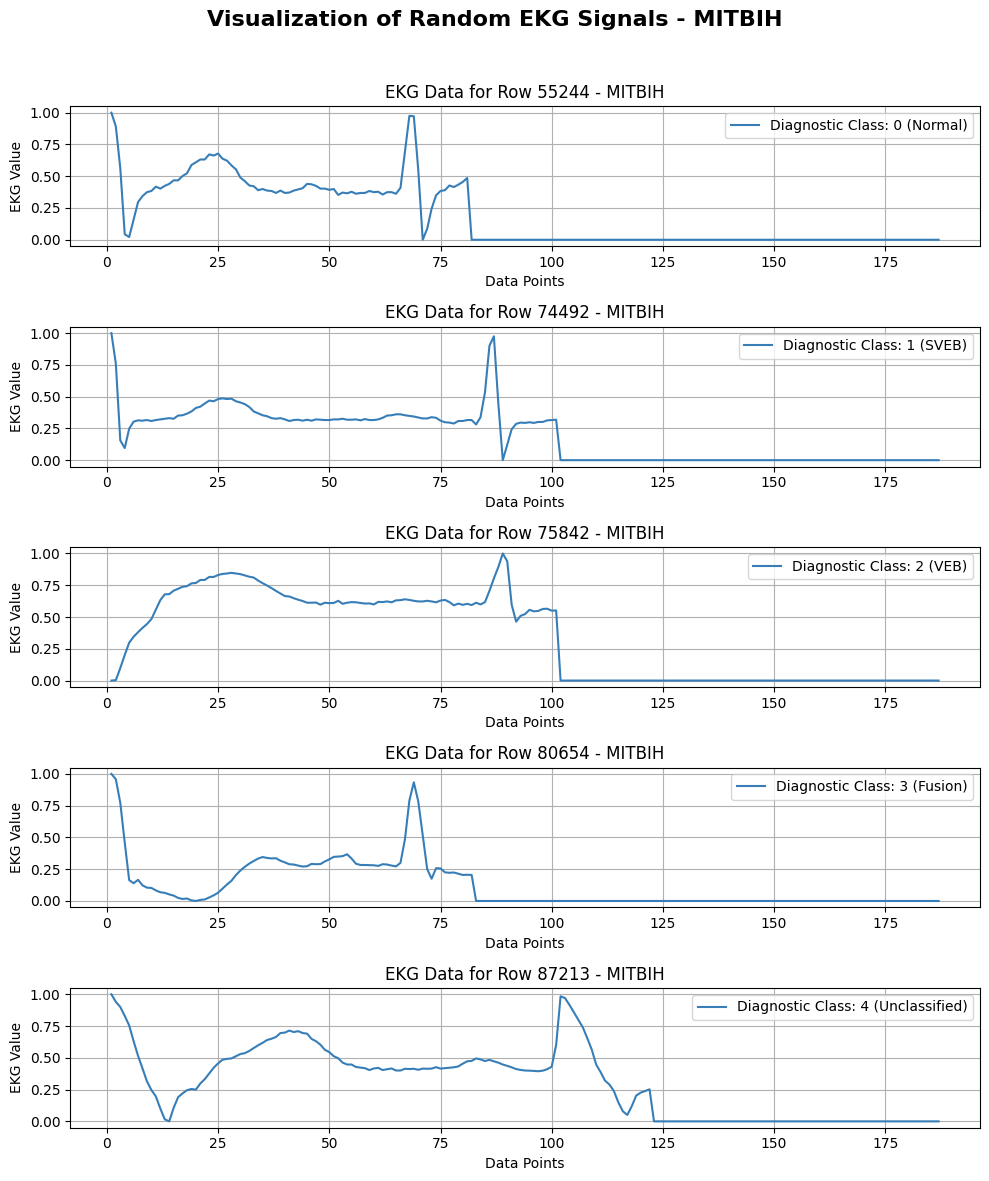

In [3]:
import random

# Define diagnostic class names
ptbdb_class_names = {0: "Normal", 1: "Pathological"}
mitbih_class_names = {
    0: "Normal",
    1: "SVEB",
    2: "VEB",
    3: "Fusion",
    4: "Unclassified",
}

# PTBDB Visualization: Random Signal from Each Class
plt.figure(figsize=(10, 6))

# Class information: 0 = Normal, 1 = Pathological
classes_ptbdb = [0, 1]

for i, cls in enumerate(classes_ptbdb):
    # Select a random row for the respective class
    random_row = ptbdb_comb_df[ptbdb_comb_df[188] == cls].sample(1)
    signal = random_row.iloc[0, :187]
    row_index = random_row.index[0]
    class_name = ptbdb_class_names[cls]
    
    # Plot the signal
    plt.subplot(2, 1, i + 1)
    plt.plot(range(1, 188), signal, label=f"Diagnostic Class: {cls} ({class_name})", color='#377eb8')
    plt.xlabel('Data Points')
    plt.ylabel('EKG Value')
    plt.title(f'EKG Data for Row {row_index} - PTBDB')
    plt.legend()
    plt.grid(True)

plt.suptitle('Visualization of Random EKG Signals - PTBDB', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# MITBIH Visualization: Random Signal from Each Class
plt.figure(figsize=(10, 12))

# Class information: 0 = Normal, 1-4 = Other Diagnoses
classes_mitbih = [0, 1, 2, 3, 4]

for i, cls in enumerate(classes_mitbih):
    # Select a random row for the respective class
    random_row = mitbih_train_df[mitbih_train_df[188] == cls].sample(1)
    signal = random_row.iloc[0, :187]
    row_index = random_row.index[0]
    class_name = mitbih_class_names[cls]
    
    # Plot the signal
    plt.subplot(5, 1, i + 1)
    plt.plot(range(1, 188), signal, label=f"Diagnostic Class: {cls} ({class_name})", color='#377eb8')
    plt.xlabel('Data Points')
    plt.ylabel('EKG Value')
    plt.title(f'EKG Data for Row {row_index} - MITBIH')
    plt.legend()
    plt.grid(True)

plt.suptitle('Visualization of Random EKG Signals - MITBIH', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


This visualization only serves to give an impression of how exemplary signals of the different classes of data sets can look and what the basic structure of the data is. 

Even at first glance, clear differences between the various signals can be identified. It is possible for a physician to use these signals to arrive at the same classification as the one already given. 

### **Normal EKG-Signal:**
![Normal ECG Signal](../App/EDA/visualizations/normal_ekg_signal.png)

The graph shows a regular EKG-Signal as a comparison. 

The signal begins with a P wave, followed by a QRS complex and finally the T wave. It is important to note that the shape of the T wave is determined by the QRS complex as it is sequential data and the T wave reflects the regression of excitation of the heart. 

### **Exemplary EKG-Signal from the MIT-BIH-Database:**

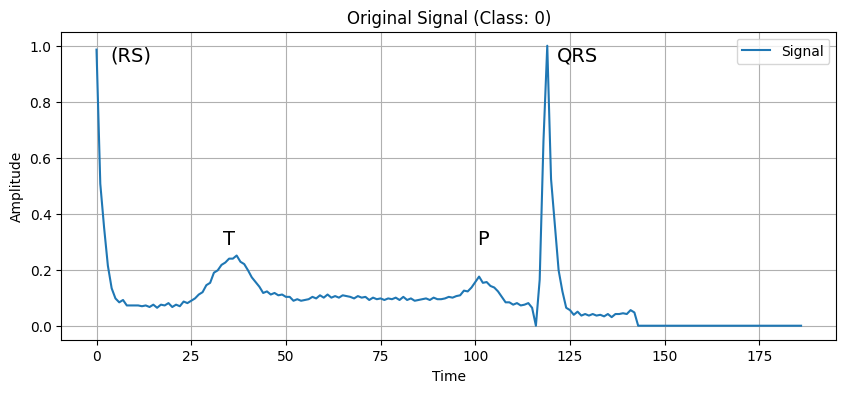

In [4]:
# Visualization of an individual signal
idx_example = 16

original_signal = mitbih_train_df.iloc[idx_example, :-1].values
class_label = mitbih_train_df.iloc[idx_example, -1]

plt.figure(figsize=(10, 4))
plt.plot(original_signal, label="Signal")
plt.title(f'Original Signal (Class: {class_label})')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)

plt.text(102, original_signal[35] + 0.05, "P", fontsize=14, color="black", ha="center")
plt.text(127, original_signal[90] + 0.85, "QRS", fontsize=14, color="black", ha="center")
plt.text(35, original_signal[35] + 0.05, "T", fontsize=14, color="black", ha="center")
plt.text(9, original_signal[90] + 0.85, "(RS)", fontsize=14, color="black", ha="center")

plt.legend()
plt.show()

We can see that the Signal (here as an example a normal heartbeat (Class:0)) deviates from the regular ECG signal in the following way:
- In the column with index 0, the signal starts as an annotation signal, triggered by the maximum of a QRS complex. The signal therefore begins with an incomplete QRS complex (actually only RS-Complex).
- This is followed by the T wave, which represents the regression of the excitation of the incompletely imaged QRS complex.
- If present, the P-wave then occurs.
- This is followed by the actual QRS complex which needs to be analyzed. 

- <u> This means: To determine the heart rhythm (class 0-4) a T-wave is used which is not related to the QRS complex which is primarily analyzed. <u>

## **4. Class Distribution**

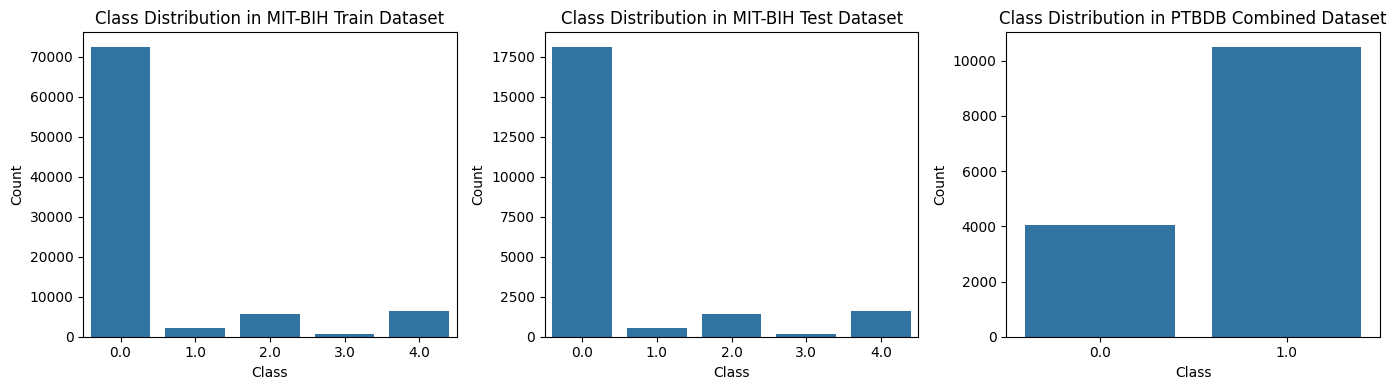

In [5]:
# Combine PTBDB datasets
ptbdb_combined = pd.concat([ptbdb_normal, ptbdb_abnormal])

# Create a figure and axes for the subplots
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

# Plot class distribution for MIT-BIH Train Dataset
sns.countplot(x=mitbih_train[187], ax=axes[0])
axes[0].set_title('Class Distribution in MIT-BIH Train Dataset')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')

# Plot class distribution for MIT-BIH Test Dataset
sns.countplot(x=mitbih_test[187], ax=axes[1])
axes[1].set_title('Class Distribution in MIT-BIH Test Dataset')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')

# Plot class distribution for PTBDB Combined Dataset
sns.countplot(x=ptbdb_combined[187], ax=axes[2])
axes[2].set_title('Class Distribution in PTBDB Combined Dataset')
axes[2].set_xlabel('Class')
axes[2].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

plt.show()

The figure presents the class distribution for two heartbeat datasets: MIT-BIH Train and MIT-BIH Test. The classes are labeled as N (Normal), S (Supraventricular ectopic beat), V (Ventricular ectopic beat), F (Fusion of ventricular and normal beat), and Q (Unclassifiable beat).
The MIT-BIH Train dataset is heavily skewed towards the Normal (N) class, which constitutes the majority of the dataset. There is a notable presence of V and Q classes, while the S and F classes are underrepresented. Similarly, the MIT-BIH Test dataset shows the Normal (N) class as the most dominant. The distribution of other classes (S, V, F, Q) is consistent with the training dataset, indicating a balanced representation between training and testing data.

The class imbalance, particularly the dominance of the Normal (N) class, can affect model training. Models may become biased towards the majority class, potentially leading to poor performance in detecting minority classes. Ensuring balanced representation or using techniques such as class weighting or oversampling can help mitigate this issue, leading to more robust and accurate diagnostic models. Given the skewed distribution, more resources may need to be allocated to improve the detection of less represented classes (S, V, F, Q). This focus is critical for developing comprehensive diagnostic tools that can accurately identify all types of heartbeats.
Accurate and balanced detection of all heartbeat types is crucial for reliable patient diagnosis and care. The skewed distributions highlight the need for targeted efforts to improve the detection of rare but clinically significant heartbeats. Enhanced diagnostic tools can lead to better patient outcomes by enabling timely and accurate identification of various cardiac conditions, reducing the risk of misdiagnosis.

To address class imbalance, it is recommended to implement techniques such as class weighting, oversampling of minority classes, or undersampling of the majority class in the MIT-BIH datasets. Data augmentation methods can also be considered to increase the representation of underrepresented classes. Developing and training models specifically tailored to improve the detection of less represented classes (S, V, F, Q) ensures a comprehensive diagnostic approach. Utilizing ensemble methods to combine different models can enhance overall performance and accuracy. Further research should be conducted to understand the clinical significance of each class and its impact on patient outcomes. Investing in advanced diagnostic tools that leverage the balanced detection of all classes can improve overall healthcare delivery.

By addressing class imbalances and focusing on improving diagnostic capabilities for all heartbeat types, healthcare organizations can enhance their data-driven strategies, leading to better diagnostic solutions, cost efficiencies, and improved patient outcomes.


## **5. Correlation Matrix**

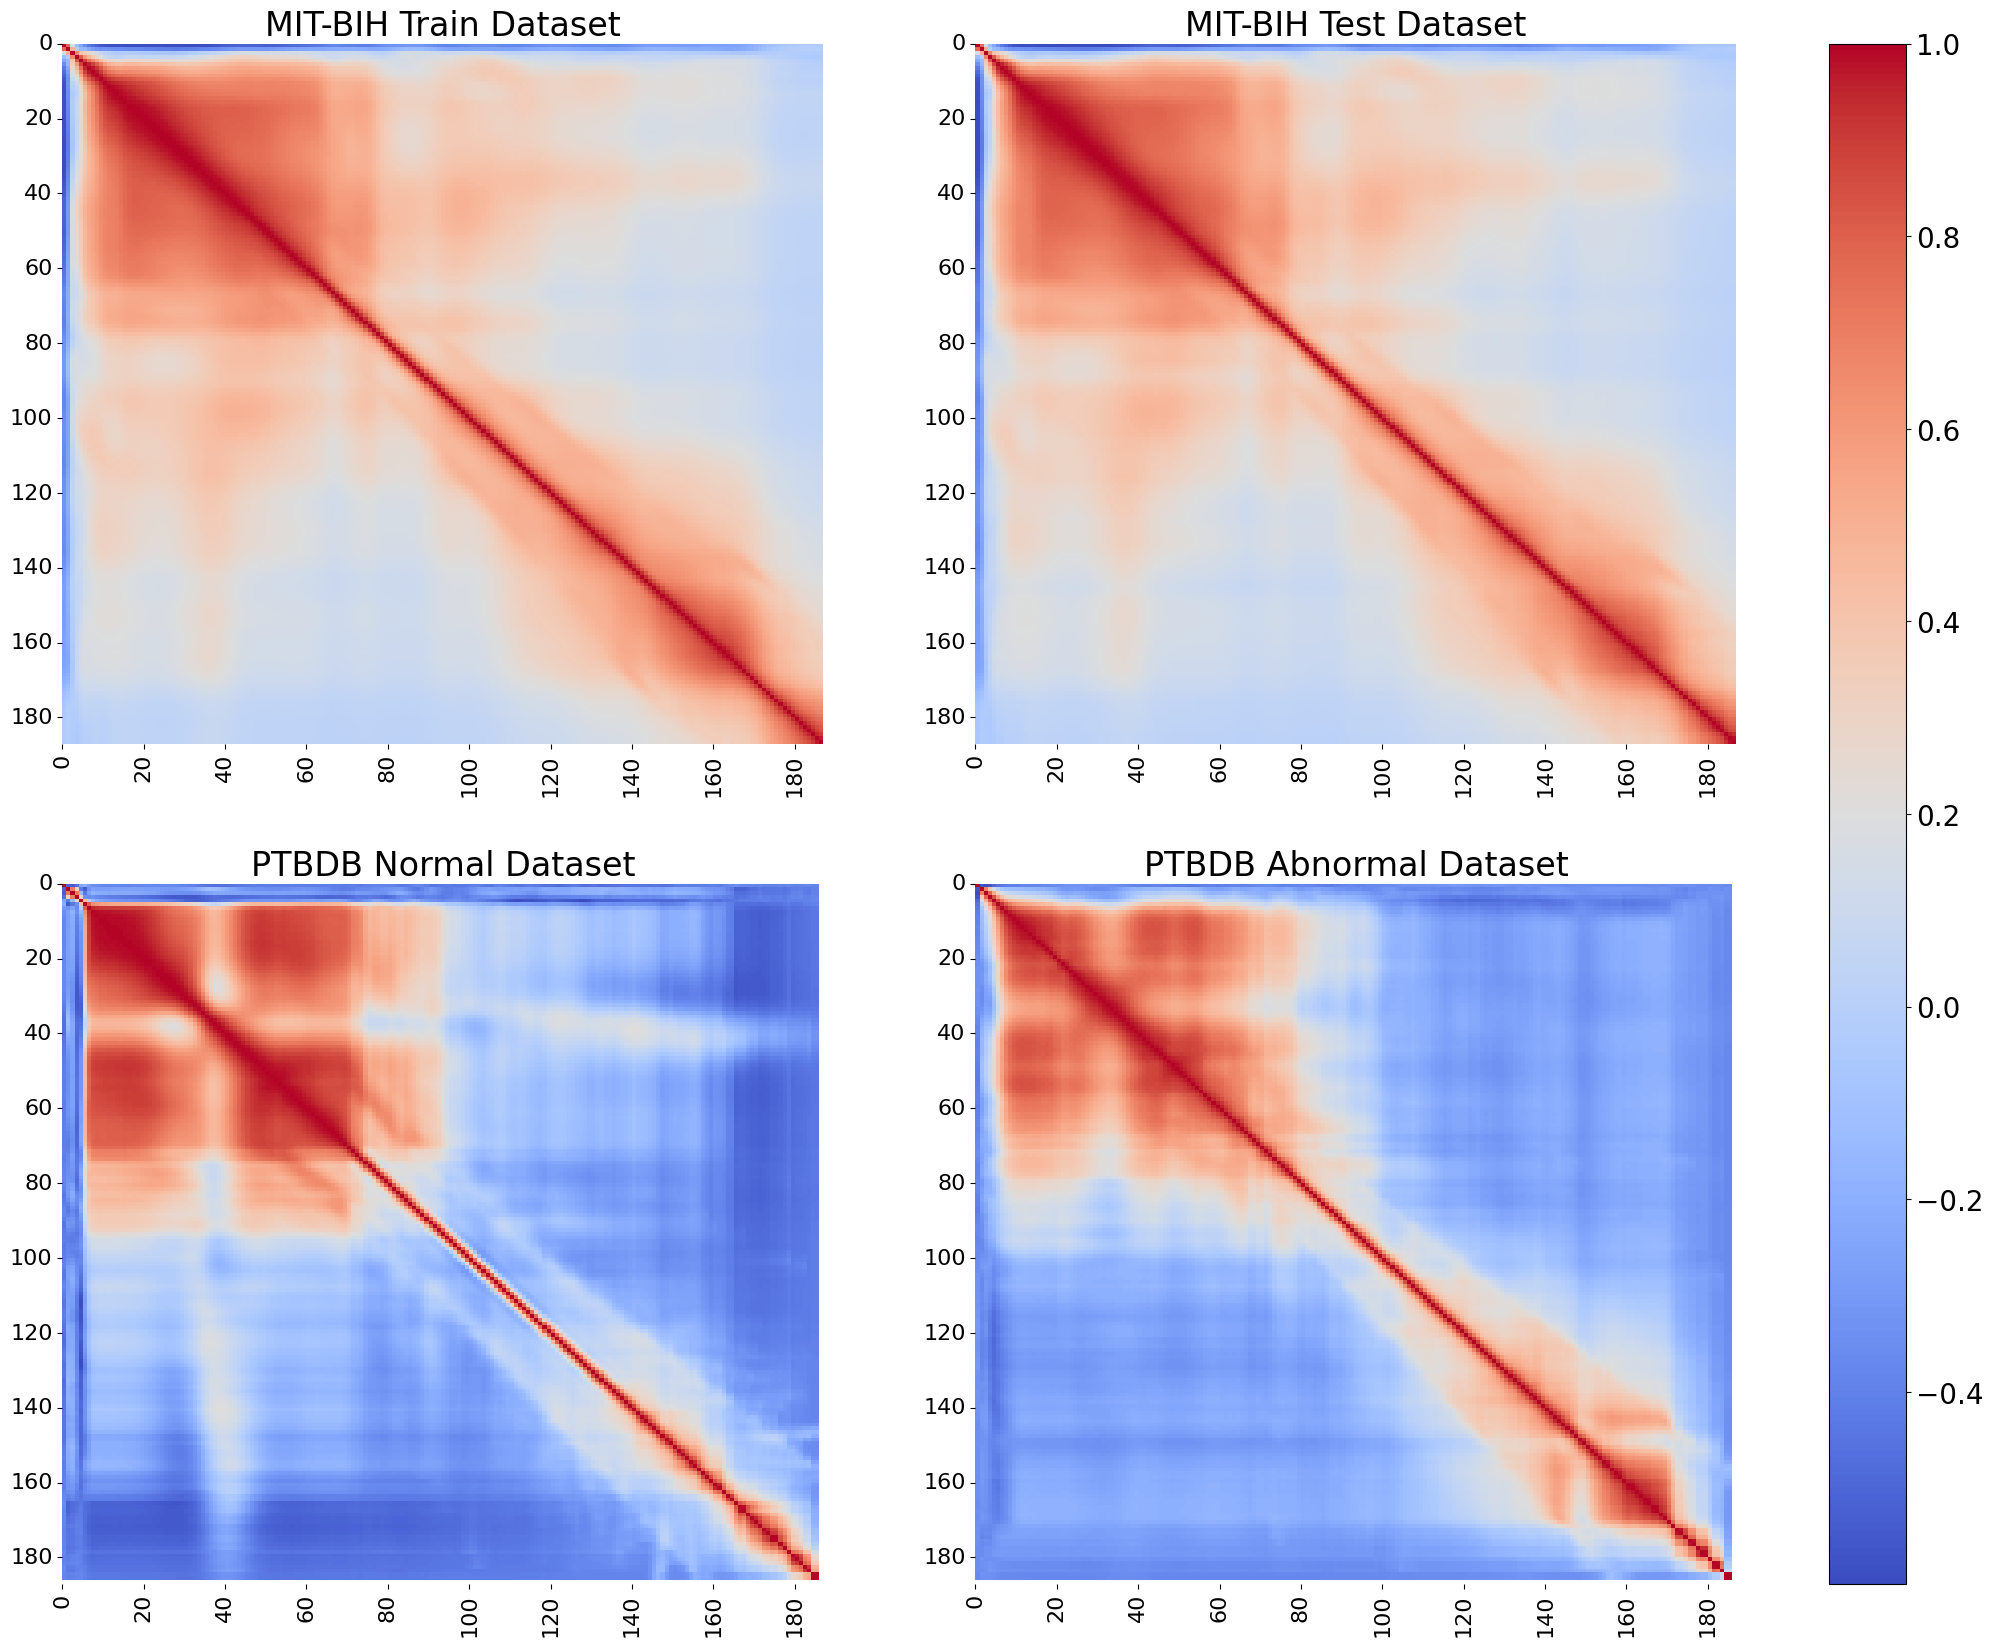

In [6]:
# Compute correlation matrices
corr_mitbih_train = mitbih_train.iloc[:, :-1].corr()
corr_mitbih_test = mitbih_test.iloc[:, :-1].corr()
corr_ptbdb_normal = ptbdb_normal.iloc[:, :-1].corr()
corr_ptbdb_abnormal = ptbdb_abnormal.iloc[:, :-1].corr()



fig, axes = plt.subplots(2, 2, figsize=(24, 20))
# Function to adjust tick labels
def set_ticks(ax, num_features):
    ax.set_xticks(range(0, num_features, 20))
    ax.set_xticklabels(range(0, num_features, 20), fontsize=16, rotation=90)
    ax.set_yticks(range(0, num_features, 20))
    ax.set_yticklabels(range(0, num_features, 20), fontsize=16)

# Plot MIT-BIH Train Dataset Correlation Matrix
sns.heatmap(corr_mitbih_train, annot=False, cmap='coolwarm', ax=axes[0, 0], cbar=False)
axes[0, 0].set_title('MIT-BIH Train Dataset', fontsize=24)
set_ticks(axes[0, 0], mitbih_train.shape[1] - 1)

# Plot MIT-BIH Test Dataset Correlation Matrix
sns.heatmap(corr_mitbih_test, annot=False, cmap='coolwarm', ax=axes[0, 1], cbar=False)
axes[0, 1].set_title('MIT-BIH Test Dataset', fontsize=24)
set_ticks(axes[0, 1], mitbih_test.shape[1] - 1)

# Plot PTBDB Normal Dataset Correlation Matrix
sns.heatmap(corr_ptbdb_normal, annot=False, cmap='coolwarm', ax=axes[1, 0], cbar=False)
axes[1, 0].set_title('PTBDB Normal Dataset', fontsize=24)
set_ticks(axes[1, 0], ptbdb_normal.shape[1] - 1)

# Plot PTBDB Abnormal Dataset Correlation Matrix
sns.heatmap(corr_ptbdb_abnormal, annot=False, cmap='coolwarm', ax=axes[1, 1], cbar=False)
axes[1, 1].set_title('PTBDB Abnormal Dataset', fontsize=24)
set_ticks(axes[1, 1], ptbdb_abnormal.shape[1] - 1)

# Add a single colorbar for the entire figure
# Adjust colorbar tick size
cbar = fig.colorbar(axes[0, 0].collections[0], ax=axes, orientation='vertical', fraction=0.05, pad=0.05)
cbar.ax.tick_params(labelsize=20)


plt.show()

The figure presents correlation matrices for four heartbeat datasets: MIT-BIH Train, MIT-BIH Test, PTBDB Normal, and PTBDB Abnormal. The color gradient from blue to red indicates the strength of these correlations.

The MIT-BIH Train and Test datasets show similar correlation patterns, suggesting consistency between training and testing data, which is crucial for developing reliable predictive models. The strong diagonal correlations indicate that features are more strongly correlated with themselves, as expected. The PTBDB Normal dataset shows lower overall correlations, while the PTBDB Abnormal dataset displays higher correlations, indicating more pronounced and interrelated features in abnormal heartbeats.

These insights can refine diagnostic algorithms, making them more adept at distinguishing between normal and abnormal heartbeats, thereby reducing misdiagnosis and improving patient outcomes. By focusing on highly correlated features in the abnormal dataset, healthcare providers can streamline data processing, leading to significant cost savings and increased efficiency. More accurate diagnostics can lead to quicker and more reliable patient outcomes, enhancing overall patient care and satisfaction.

Based on this analysis, it is recommended to reduce dimensionality by focusing on highly correlated features within the abnormal dataset. This can streamline the model without compromising its diagnostic power, improving both efficiency and accuracy. Additionally, leveraging these correlation insights during model training will ensure that the model learns the most significant patterns for both normal and abnormal heartbeats, leading to better generalization and predictive performance. Further research should be conducted to understand the underlying reasons for the observed correlations, potentially uncovering new biomarkers for heart conditions and leading to the development of even more effective diagnostic tools.

By translating these technical findings into actionable business insights, healthcare organizations can enhance their data-driven strategies, leading to improved diagnostic solutions, cost efficiencies, and better patient outcomes.


## **6. Relationship between averaged and individual signal**

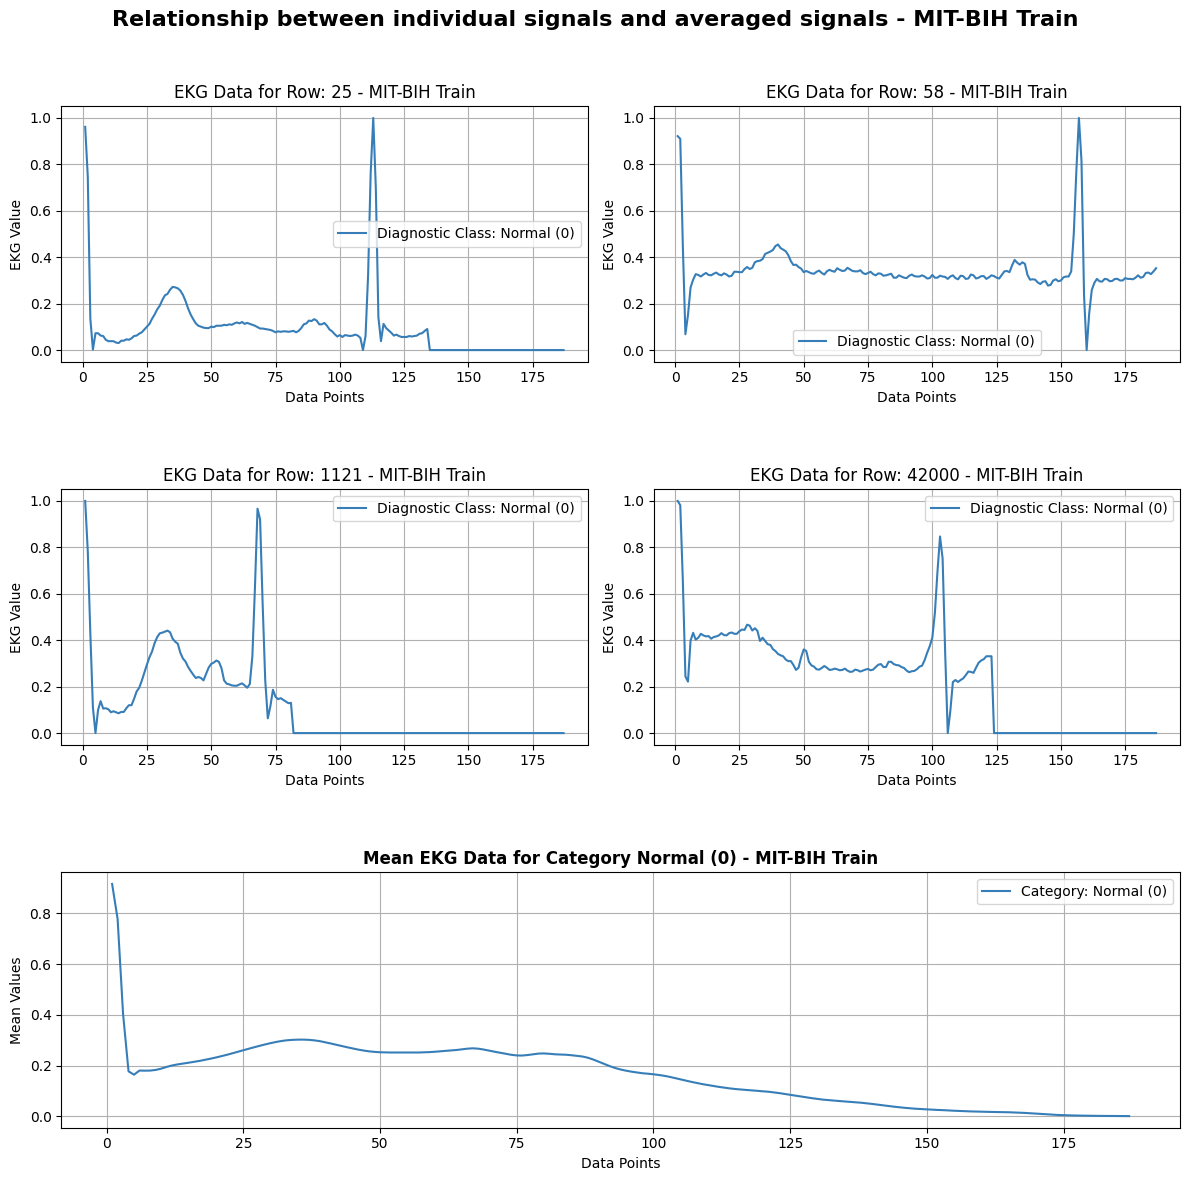

In [7]:
import matplotlib.pyplot as plt

# Updated category mapping
category_mapping = {
    0: "Normal (0)",
    1: "Supraventricular (1)",
    2: "Ventricular (2)",
    3: "Fusion-beat (3)",
    4: "Unclassified (4)"
}

fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# Plot 1
category_label = category_mapping[mitbih_train_df.iloc[25, 187]]
axs[0, 0].plot(range(1, 188), mitbih_train_df.iloc[25, :187], 
               label=f"Diagnostic Class: {category_label}", color='#377eb8')
axs[0, 0].set_xlabel('Data Points')
axs[0, 0].set_ylabel('EKG Value')
axs[0, 0].set_title('EKG Data for Row: 25 - MIT-BIH Train')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Plot 2
category_label = category_mapping[mitbih_train_df.iloc[58, 187]]
axs[0, 1].plot(range(1, 188), mitbih_train_df.iloc[58, :187], 
               label=f"Diagnostic Class: {category_label}", color='#377eb8')
axs[0, 1].set_xlabel('Data Points')
axs[0, 1].set_ylabel('EKG Value')
axs[0, 1].set_title('EKG Data for Row: 58 - MIT-BIH Train')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Plot 3
category_label = category_mapping[mitbih_train_df.iloc[1121, 187]]
axs[1, 0].plot(range(1, 188), mitbih_train_df.iloc[1121, :187], 
               label=f"Diagnostic Class: {category_label}", color='#377eb8')
axs[1, 0].set_xlabel('Data Points')
axs[1, 0].set_ylabel('EKG Value')
axs[1, 0].set_title('EKG Data for Row: 1121 - MIT-BIH Train')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Plot 4
category_label = category_mapping[mitbih_train_df.iloc[42000, 187]]
axs[1, 1].plot(range(1, 188), mitbih_train_df.iloc[42000, :187], 
               label=f"Diagnostic Class: {category_label}", color='#377eb8')
axs[1, 1].set_xlabel('Data Points')
axs[1, 1].set_ylabel('EKG Value')
axs[1, 1].set_title('EKG Data for Row: 42000 - MIT-BIH Train')
axs[1, 1].legend()
axs[1, 1].grid(True)

# Displaying the Mean by category in a larger subplot spanning the entire bottom row
axs[2, 0].remove()  # Remove the subplot at position [2, 0] to merge cells
axs[2, 1].remove()  # Remove the subplot at position [2, 1] to merge cells
ax_mean = fig.add_subplot(3, 2, (5, 6))

grouped = mitbih_train_df.groupby(188)
means = grouped.mean()
category_0_mean = means.loc[0] 
ax_mean.plot(range(1, 188), category_0_mean, label='Category: Normal (0)', color='#377eb8')

ax_mean.set_xlabel('Data Points')
ax_mean.set_ylabel('Mean Values')
ax_mean.set_title('Mean EKG Data for Category Normal (0) - MIT-BIH Train', fontweight = "bold")
ax_mean.legend()
ax_mean.grid(True)

fig.suptitle('Relationship between individual signals and averaged signals - MIT-BIH Train', fontsize=16, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.subplots_adjust(hspace=0.5)  
plt.show()

The graphs in this section are combined graphs and refer to one of the two data sets (PTBDB, MIT-BIH). First, 4 exemplary individual ECG signals are shown, then the mean value over the lines of all ECG signals is shown, the values here all refer to ECG signals that were classified as either normal (MIT-BIH-Dataset) or abnormal (PTBDB-Dataset). This selection was purely random and is intended to illustrate that the observations apply to all diagnostic classes of both data sets (MIT-BIH and PTBDB).

The P wave, QRS complex and T wave can be clearly differentiated in the individual signals. The basic pattern is a data peak in columns 0-3, followed by a rapid drop. This data peak is a consequence of the pre-processing of the data and is not part of the actual ECG signal. The actual ECG signal begins with the start of the T wave, with a data peak on average around data points 25-50. As a consequence of different heart rates, the P wave and QRS complex appear at different data points. After the QRS complex, the filling with zeros occurs at different data points as well - also as a result of the pre-processing of the data. This is also not part of the actual ECG signal.

These observations help in understanding the averaged ECG signal for normal heartbeats. For the MIT-BIH-Dataset (Diagnostic Class: Normal) there is a high signal at the beginning which then decreases continuously, there are peaks around the data points 25-40 as well as 60 and 80. While the individual signals are therefore quite diagnostic, this is no longer the case for the averaged data points. The only part of the signal that can still be traced reliably using the averaged values is the T-wave.

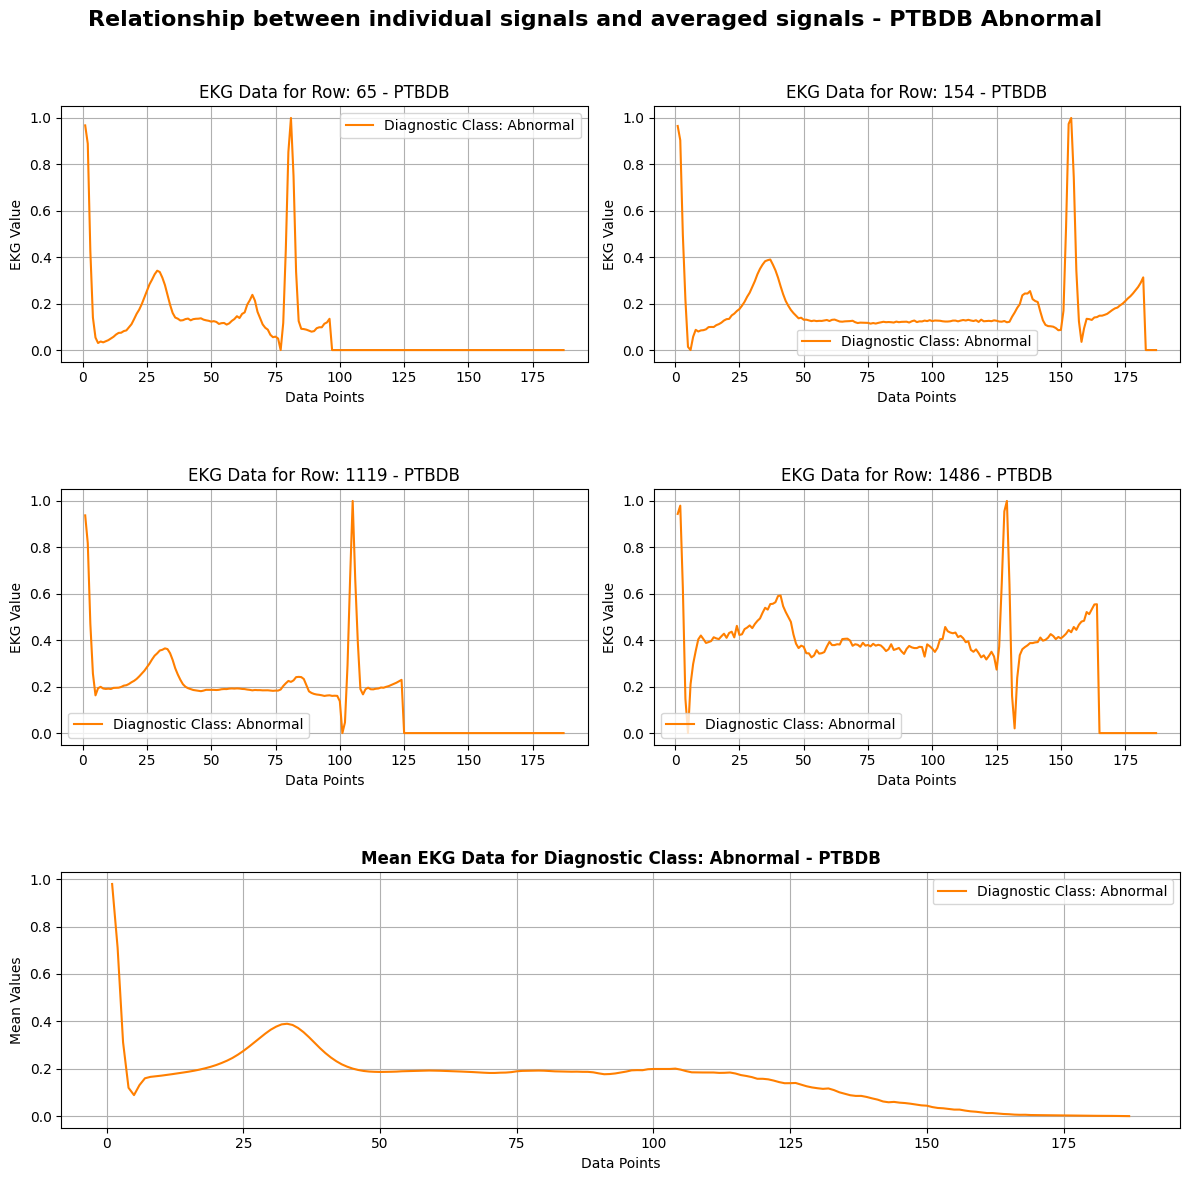

In [8]:
colors = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628']

# Category mapping
category_mapping = {0: 'Abnormal', 1: 'Normal'}

# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# Plot 1: Example individual signal
axs[0, 0].plot(range(1, 188), ptbdb_comb_df.iloc[65, :187], 
               label=f'Diagnostic Class: {category_mapping[ptbdb_comb_df.iloc[65, 187]]}', color=colors[1])
axs[0, 0].set_xlabel('Data Points')
axs[0, 0].set_ylabel('EKG Value')
axs[0, 0].set_title('EKG Data for Row: 65 - PTBDB')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Plot 2: Example individual signal
axs[0, 1].plot(range(1, 188), ptbdb_comb_df.iloc[154, :187], 
               label=f'Diagnostic Class: {category_mapping[ptbdb_comb_df.iloc[154, 187]]}', color=colors[1])
axs[0, 1].set_xlabel('Data Points')
axs[0, 1].set_ylabel('EKG Value')
axs[0, 1].set_title('EKG Data for Row: 154 - PTBDB')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Plot 3: Example individual signal
axs[1, 0].plot(range(1, 188), ptbdb_comb_df.iloc[1119, :187], 
               label=f'Diagnostic Class: {category_mapping[ptbdb_comb_df.iloc[1119, 187]]}', color=colors[1])
axs[1, 0].set_xlabel('Data Points')
axs[1, 0].set_ylabel('EKG Value')
axs[1, 0].set_title('EKG Data for Row: 1119 - PTBDB')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Plot 4: Example individual signal
axs[1, 1].plot(range(1, 188), ptbdb_comb_df.iloc[1486, :187], 
               label=f'Diagnostic Class: {category_mapping[ptbdb_comb_df.iloc[1486, 187]]}', color=colors[1])
axs[1, 1].set_xlabel('Data Points')
axs[1, 1].set_ylabel('EKG Value')
axs[1, 1].set_title('EKG Data for Row: 1486 - PTBDB')
axs[1, 1].legend()
axs[1, 1].grid(True)

for ax in axs[2, :]:
    ax.remove() 

ax_mean = fig.add_subplot(3, 1, 3)  

grouped = ptbdb_comb_df.groupby(188)
means = grouped.mean()
category_0_mean = means.loc[0]
ax_mean.plot(range(1, 188), category_0_mean, label='Diagnostic Class: Abnormal', color=colors[1])
ax_mean.set_xlabel('Data Points')
ax_mean.set_ylabel('Mean Values')
ax_mean.set_title('Mean EKG Data for Diagnostic Class: Abnormal - PTBDB', fontweight = "bold")
ax_mean.legend()
ax_mean.grid(True)

# Add main title
fig.suptitle('Relationship between individual signals and averaged signals - PTBDB Abnormal', fontsize=16, fontweight = "bold")

plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.subplots_adjust(hspace=0.5) 
plt.show()

These observations can not only be traced using the ECG signals visualized here as an example, but also exist for all diagnostic classes for both data sets. The graphs below show the averaged signals of all corresponding classes. While there are clear differences between the various classes of the averaged signals, the actual ECG signal is no longer clearly discernible for any of the classes.

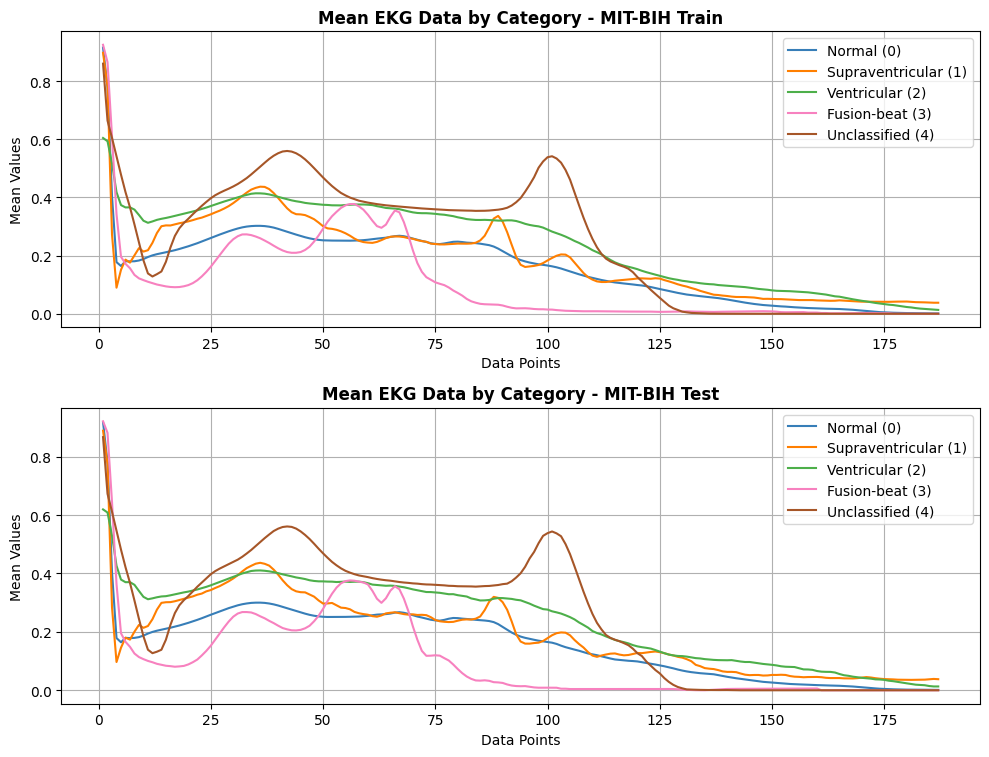

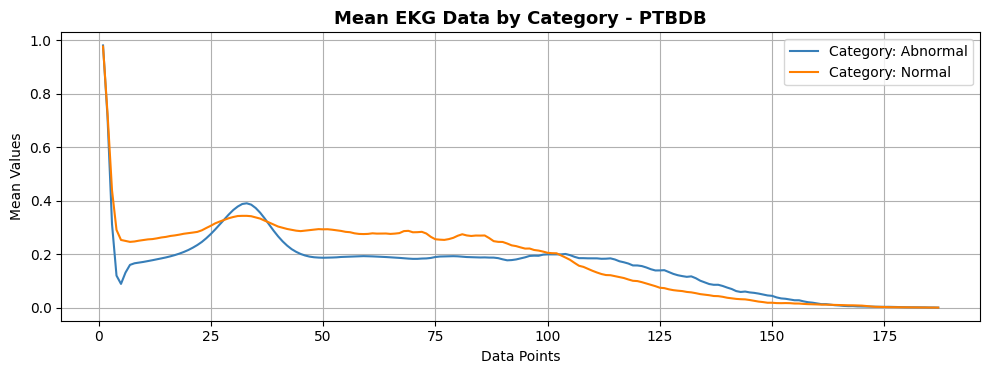

In [9]:
# MIT-BIH
categories = ["Normal", "Supraventricular", "Ventricular", "Fusion-beat", "Unclassified"]

category_mapping = {
    0: "Normal (0)",
    1: "Supraventricular (1)",
    2: "Ventricular (2)",
    3: "Fusion-beat (3)",
    4: "Unclassified (4)"
}
class_numbers = {v: k for k, v in category_mapping.items()}

colors = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628']

# First plot: Train Data
grouped_train = mitbih_train_df.groupby(188)
means_train = grouped_train.mean()

plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
for i, category in enumerate(means_train.index):
    category_name = category_mapping[category]
    plt.plot(range(1, 188), means_train.loc[category], label=f'{category_name}', color=colors[i])
plt.xlabel('Data Points')
plt.ylabel('Mean Values')
plt.title('Mean EKG Data by Category - MIT-BIH Train', fontweight = "bold")
plt.legend()
plt.grid(True)

# Second plot: Testing data
grouped_test = mitbih_test_df.groupby(188)
means_test = grouped_test.mean()

plt.subplot(2, 1, 2)
for i, category in enumerate(means_test.index):
    category_name = category_mapping[category]
    plt.plot(range(1, 188), means_test.loc[category], label=f'{category_name}', color=colors[i])
plt.xlabel('Data Points')
plt.ylabel('Mean Values')
plt.title('Mean EKG Data by Category - MIT-BIH Test', fontweight = "bold")
plt.legend()
plt.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
# plt.savefig('mean_ekg_data_mit_bih.png')
plt.show()

# PTBDB
grouped = ptbdb_comb_df.groupby(188)

means = grouped.mean()
colors = ['#377eb8', '#ff7f00'] 

category_mapping = {0: 'Abnormal', 1: 'Normal'}

plt.figure(figsize=(10, 4))
for i, category in enumerate(means.index):
    plt.plot(range(1, 188), means.loc[category], label=f'Category: {category_mapping[category]}', color=colors[i])
plt.xlabel('Data Points')
plt.ylabel('Mean Values')
plt.title('Mean EKG Data by Category - PTBDB', fontsize=13, fontweight = "bold")
plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.legend()
plt.grid(True)
# plt.savefig('mean_data_PTBDB.png')
plt.show()


Furthermore, the data peak in the first columns of each signal, as well as all averaged signals, is noticeable. The first column serves as an annotation signal for the previous QRS complex. Most signals were assigned the value 1 here.The lower graphs show histograms for the data distribution in column 1. With such a large overlap, it can be assumed that the diagnostic discriminatory power of this row itself is low. 

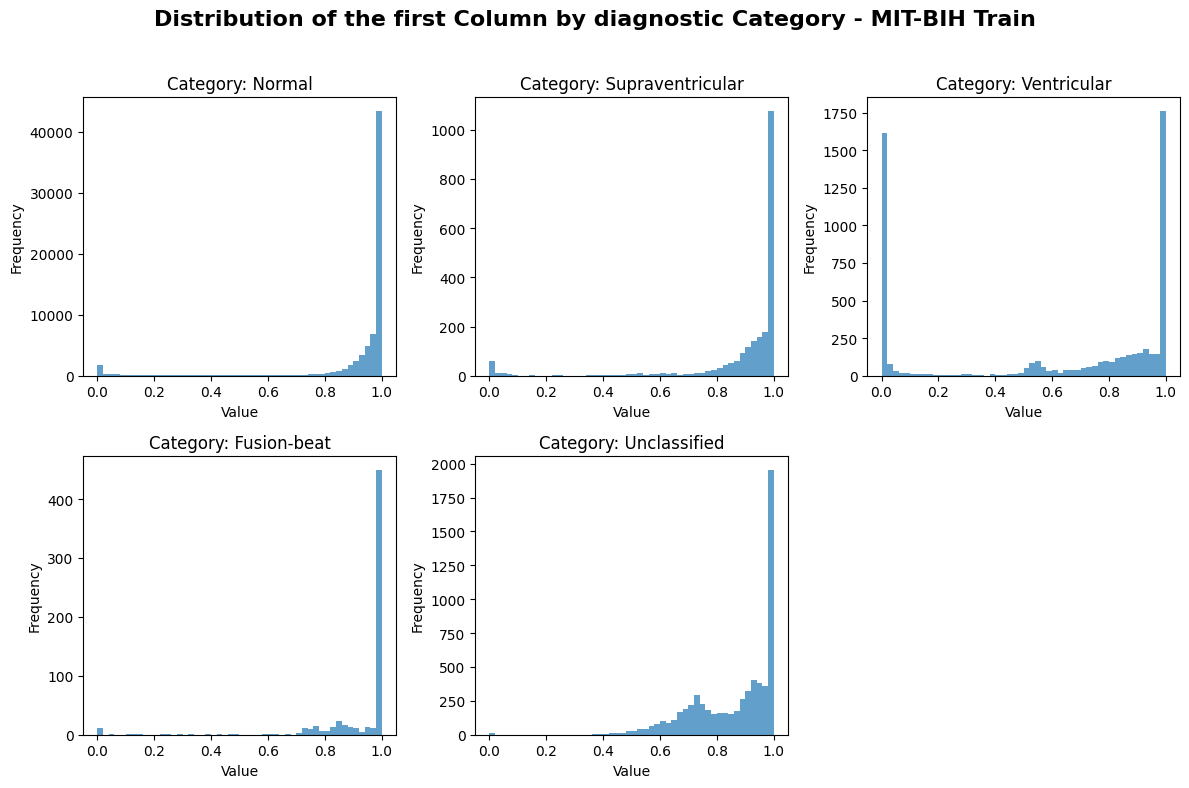

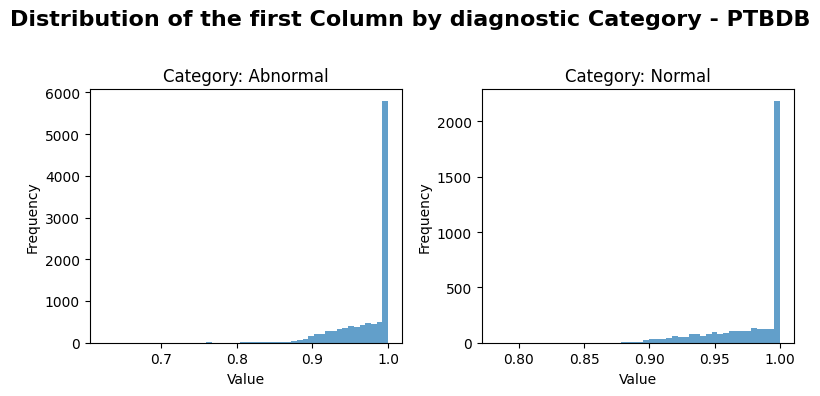

In [10]:
# MIT-BIH

category_mapping = {
    0: "Normal",
    1: "Supraventricular",
    2: "Ventricular",
    3: "Fusion-beat",
    4: "Unclassified"
}
class_numbers = {v: k for k, v in category_mapping.items()}

plt.figure(figsize=(12, 8))

for i, category in enumerate(categories):
    plt.subplot(2, 3, i + 1)
    subset_df = mitbih_train_df[mitbih_train_df[188] == class_numbers[category]]
    plt.hist(subset_df.iloc[:, 0], bins=50, alpha=0.7, label=f'Category {category}')
    plt.title(f'Category: {category}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.suptitle('Distribution of the first Column by diagnostic Category - MIT-BIH Train', fontsize=16, fontweight = "bold")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('MITBIH_dist_first_row.png')
plt.show()

# PTBDB
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.hist(ptbdb_abnormal_df.iloc[:, 0], bins=50, alpha=0.7, label='Abnormal')
plt.title('Category: Abnormal')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(ptbdb_normal_df.iloc[:, 0], bins=50, alpha=0.7, label='Normal')
plt.title('Category: Normal')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.suptitle('Distribution of the first Column by diagnostic Category - PTBDB', fontsize=16, fontweight = "bold")
plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.savefig('PTBDB_dist_first_row.png')
plt.show()

This observation is also statistically well substantiated. Using D'Agostino Pearson's Normality Test, all columns—separated by diagnostic categories—were tested for normal distribution. The significance level was set at alpha = 0.05. Consequently, for  the PTBDB dataset, none of the columns, for the MIT-BIH Train dataset, 0.21% of the columns, and for the MIT-BIH Test dataset, 1.06% of the columns can be assumed to follow a normal distribution. For the PTBDB-Dataset for none of the columns a normal distribiution can be assumed. These results were obtained even though the tests for normal distribution were performed separately for the respective diagnostic classes.  Thus, for the vast majority of columns, a normal distribution cannot be assumed. Given that we are assessing physiological data from humans (and have already pre-sorted by diagnostic classes), this is certainly a noteworthy fact. The preprocessing of the data is likely a significant influence here as well.

The lower raphic depicts the distribution of the data for an exemplary column along with the corresponding QQ plot. For the displayed column and diagnostic classes normal distribution can not be assumed. 

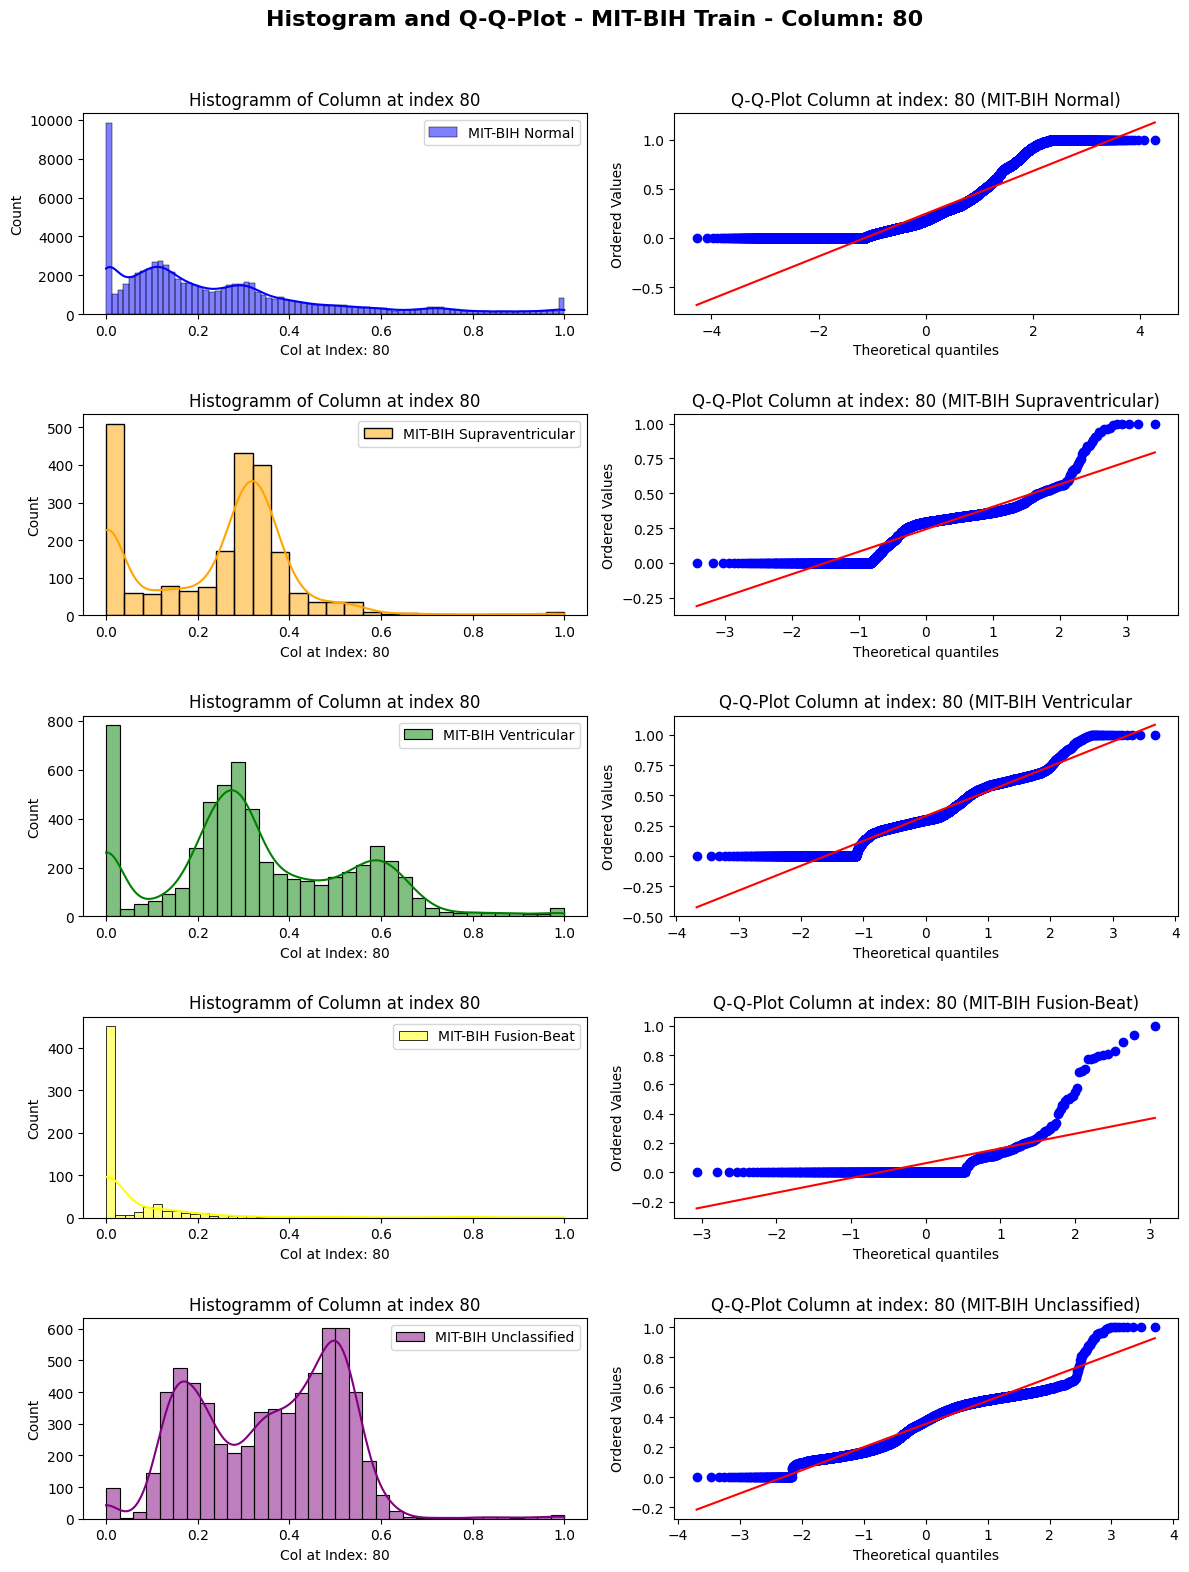

In [11]:
# Normal-Distribution of the explanatory variables? - Visual - MIT-BIH Train
# Seperated by the target variable.

# Choose Column to Check: 
column = 80

X = mitbih_train_df.iloc[:, :-1]  
y = mitbih_train_df.iloc[:, -1]   
normal = X[y == 0]
supraventricular = X[y == 1]
ventricular = X[y == 2]
fusion = X[y == 3]
unclassified = X[y == 4]

plt.figure(figsize=(12, 16))

plt.subplot(5, 2, 1)
sns.histplot(normal.iloc[:, column], kde=True, color='blue', label='MIT-BIH Normal')
plt.xlabel(f"Col at Index: {column}")
plt.legend()
plt.title(f'Histogramm of Column at index {column}')

plt.subplot(5, 2, 3)
sns.histplot(supraventricular.iloc[:, column], kde=True, color='orange', label='MIT-BIH Supraventricular')
plt.xlabel(f"Col at Index: {column}")
plt.legend()
plt.title(f'Histogramm of Column at index {column}')

plt.subplot(5, 2, 5)
sns.histplot(ventricular.iloc[:, column], kde=True, color='green', label='MIT-BIH Ventricular')
plt.xlabel(f"Col at Index: {column}")
plt.legend()
plt.title(f'Histogramm of Column at index {column}')

plt.subplot(5, 2, 7)
sns.histplot(fusion.iloc[:, column], kde=True, color='yellow', label='MIT-BIH Fusion-Beat')
plt.xlabel(f"Col at Index: {column}")
plt.legend()
plt.title(f'Histogramm of Column at index {column}')

plt.subplot(5, 2, 9)
sns.histplot(unclassified.iloc[:, column], kde=True, color='purple', label='MIT-BIH Unclassified')
plt.xlabel(f"Col at Index: {column}")
plt.legend()
plt.title(f'Histogramm of Column at index {column}')

plt.subplot(5, 2, 2)
stats.probplot(normal.iloc[:, column], dist="norm", plot=plt)
plt.title(f'Q-Q-Plot Column at index: {column} (MIT-BIH Normal)')

plt.subplot(5, 2, 4)
stats.probplot(supraventricular.iloc[:, column], dist="norm", plot=plt)
plt.title(f'Q-Q-Plot Column at index: {column} (MIT-BIH Supraventricular)')

plt.subplot(5, 2, 6)
stats.probplot(ventricular.iloc[:, column], dist="norm", plot=plt)
plt.title(f'Q-Q-Plot Column at index: {column} (MIT-BIH Ventricular')

plt.subplot(5, 2, 8)
stats.probplot(fusion.iloc[:, column], dist="norm", plot=plt)
plt.title(f'Q-Q-Plot Column at index: {column} (MIT-BIH Fusion-Beat)')

plt.subplot(5, 2, 10)
stats.probplot(unclassified.iloc[:, column], dist="norm", plot=plt)
plt.title(f'Q-Q-Plot Column at index: {column} (MIT-BIH Unclassified)')

plt.suptitle(f'Histogram and Q-Q-Plot - MIT-BIH Train - Column: {column}', fontsize=16,fontweight= "bold")

plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.subplots_adjust(hspace=0.5) 
plt.savefig('hist_qq_MITBIH.png')
plt.show()
plt.show(); 

In [12]:
# Check for normal Distribution of the columns with D'Agostino and Pearson's Normality Test - MIT-BIH Train

from scipy.stats import normaltest

X = mitbih_train_df.iloc[:, :-1]  
y = mitbih_train_df.iloc[:, -1]   
normal = X[y == 0]
supraventricular = X[y == 1]
ventricular = X[y == 2]
fusion = X[y == 3]
unclassified = X[y == 4]

def check_normality(data, alpha=0.05):
    stat, p = normaltest(data)
    return p > alpha, stat, p

# List of categories
categories = {
    'normal': normal,
    'supraventricular': supraventricular,
    'ventricular': ventricular,
    'fusion': fusion,
    'unclassified': unclassified
}

# Perform the normality test for each column in each category and store the results
normality_results = []

for column in X.columns:
    for category_name, category_data in categories.items():
        is_normal, stat, p = check_normality(category_data[column])
        normality_results.append({
            'Variable': column,
            'Category': category_name,
            'is_normal': is_normal,
            'dagostino_stat': stat,
            'p_val': p
        })

# Convert results to DataFrame
results_df = pd.DataFrame(normality_results)

# print(results_df.head(50))

filtered_results_df = results_df[results_df['p_val'] > 0.05]

# print("Reslts of Testing for Normality (MIT-BIH Train) - Seperated by Diagnostic Category \n", results_df.head(20), "\n")
print("Number of Rows of Results: ", results_df.shape[0], "\n")
print("Filtered Reslts of Testing for Normality (MIT-BIH Train) - Rows with assumed Normal Distribution - Seperated by Diagnostic Category\n",
       filtered_results_df)

Number of Rows of Results:  935 

Filtered Reslts of Testing for Normality (MIT-BIH Train) - Rows with assumed Normal Distribution - Seperated by Diagnostic Category
      Variable      Category  is_normal  dagostino_stat     p_val
13          3        fusion       True        0.859435  0.650693
449        90  unclassified       True        4.347318  0.113761


In [13]:
# Check for normal Distribution of the columns with D'Agostino and Pearson's Normality Test - MIT-BIH Test

X = mitbih_test_df.iloc[:, :-1]  
y = mitbih_test_df.iloc[:, -1]   
normal = X[y == 0]
supraventricular = X[y == 1]
ventricular = X[y == 2]
fusion = X[y == 3]
unclassified = X[y == 4]

def check_normality(data, alpha=0.05):
    stat, p = normaltest(data)
    return p > alpha, stat, p

# List of categories
categories = {
    'normal': normal,
    'supraventricular': supraventricular,
    'ventricular': ventricular,
    'fusion': fusion,
    'unclassified': unclassified
}

# Perform the normality test for each column in each category and store the results
normality_results = []

for column in X.columns:
    for category_name, category_data in categories.items():
        is_normal, stat, p = check_normality(category_data[column])
        normality_results.append({
            'Variable': column,
            'Category': category_name,
            'is_normal': is_normal,
            'dagostino_stat': stat,
            'p_val': p
        })

# Convert results to DataFrame
results_df = pd.DataFrame(normality_results)

# print(results_df.head(50))
filtered_results_df = results_df[results_df['p_val'] > 0.05]

# print("Reslts of Testing for Normality (MIT-BIH Train) - Seperated by Diagnostic Category \n", results_df.head(20), "\n")
print("Number of Rows of Results: ", results_df.shape[0], "\n")
print("Filtered Reslts of Testing for Normality (MIT-BIH Train) - Rows with assumed Normal Distribution - Seperated by Diagnostic Category\n",
       filtered_results_df)

Number of Rows of Results:  935 

Filtered Reslts of Testing for Normality (MIT-BIH Train) - Rows with assumed Normal Distribution - Seperated by Diagnostic Category
      Variable          Category  is_normal  dagostino_stat     p_val
151        31  supraventricular       True        2.844538  0.241166
156        32  supraventricular       True        1.822854  0.401950
206        42  supraventricular       True        0.272334  0.872697
404        81      unclassified       True        2.169053  0.338062
409        82      unclassified       True        3.093586  0.212930
429        86      unclassified       True        5.393187  0.067435
439        88      unclassified       True        3.414377  0.181375
444        89      unclassified       True        0.359485  0.835485
449        90      unclassified       True        5.155887  0.075930
454        91      unclassified       True        1.928847  0.381203


In [14]:
# Test for normal distribution with D'Agostino and Pearson's Normality Test - PTBDB
X = ptbdb_comb_df.iloc[:, :-1]  
y = ptbdb_comb_df.iloc[:, -1]   
normal = X[y == 0]
abnormal = X[y == 1]


def check_normality(data, alpha=0.05):
    stat, p = normaltest(data)
    return p > alpha, stat, p

normality_results = []
for column in X.columns:
    is_normal_normal_group, stat_normal, p_normal = check_normality(normal[column])
    is_normal_abnormal_group, stat_abnormal, p_abnormal = check_normality(abnormal[column])
    normality_results.append({
        'Variable': column,
        'is_normal_normal_group': is_normal_normal_group,
        'dagostino_stat_normal': stat_normal,
        'p_val_normal': p_normal,
        'is_normal_abnormal_group': is_normal_abnormal_group,
        'dagostino_stat_abnormal': stat_abnormal,
        'p_val_abnormal': p_abnormal
    })

results_df = pd.DataFrame(normality_results)

# Sort results if needed:
# sorted_results_df = results_df.sort_values(by='p_val_normal')

# Data filtering to identify variables:
filtered_results_df = results_df[
    (results_df['is_normal_normal_group'] == True) &
    (results_df['is_normal_abnormal_group'] == True)]

filtered_results_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Variable                  0 non-null      int64  
 1   is_normal_normal_group    0 non-null      bool   
 2   dagostino_stat_normal     0 non-null      float64
 3   p_val_normal              0 non-null      float64
 4   is_normal_abnormal_group  0 non-null      bool   
 5   dagostino_stat_abnormal   0 non-null      float64
 6   p_val_abnormal            0 non-null      float64
dtypes: bool(2), float64(4), int64(1)
memory usage: 0.0 bytes


### **Summary: Relationship between averaged and individual signal:** 
These results can be summarized into two main observations:

- First, there are significant differences between the averaged signals and the individual signals. Although these differences are understandable due to the pre-processing of the data, they still pose significant challenges. The Incomplete RS-wave was used as the start of the respective signals. T-wave, QRS-complex and P-wave occur at different data points depending on the heart rate. Therefore the diagnostically relevant P-wave (more precisely, the presence or absence of the P-wave) is lost in the averaged signal.It should also be noted that a T-wave is used to determine the heart rhythm, which actually belongs to the previous (incompletely mapped) QRS complex. 

- Secondly, as a consequence of preprocessing, patterns appear in the data that are not part of the ECG signal. These include the data spike in columns 1 and the filling with zeros after the end of the QRS complex. The basic level is also different, depending on the configuration of the QRS complex. All this leads to a distortion of the averaged data and the actual signal, which logically must reduce the efficiency of any classifying modeling algorithm.